### Pandas Tutorial 
https://pandas.pydata.org/docs/reference/index.html#api

In [2]:
import pandas as pd
import numpy as np

1.1 Input/Output

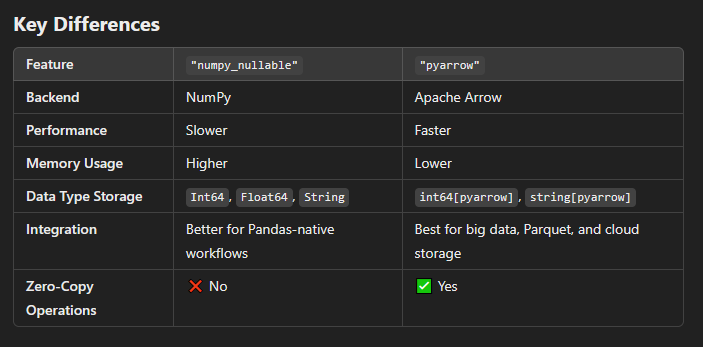

1 read_pickle

A pickle file is a file that stores serialized Python objects using the pickle module. Serialization (or pickling) is the process of converting a Python object (like a dictionary, list, Pandas DataFrame, or custom class instance) into a byte stream so it can be saved to a file or transferred over a network. The serialized byte stream can later be deserialized (unpickled) to recreate the original object in Python.

Why Use Pickle Files?

-  Save and Reload Python Objects: Pickle files allow you to save Python objects and reload them later without losing their structure or data types.

- Efficiency: Pickle is faster than storing data in text formats like JSON or CSV because it doesn't need to interpret strings.

- Versatility: It supports a wide range of Python objects, including custom classes.

Common Use Cases:

- Saving Machine Learning Models:
    - Save trained models for reuse without retraining.
- Storing Intermediate Results:
    - Save DataFrames or other complex objects during lengthy computations.
- Data Transfer:
    - Send Python objects over a network between systems.

Key Parameters of to_pickle:

-  path:

    - The file path where the pickled DataFrame will be saved.

    - Can be a string, path object, or file-like object.

- compression:

    - Specifies compression for the output file.

    - Default is 'infer', which detects compression from the file extension (e.g., .gz, .zip).

    - Set to None for no compression.

    - You can also pass a dictionary for advanced compression options (e.g., {'method': 'gzip', 'compresslevel': 1}).

- protocol:

    - Specifies the pickle protocol to use.

    - Default is 5 (the highest protocol as of Python 3.8+).

    - Lower protocols (e.g., 4, 3) are available for compatibility with older Python versions.

- storage_options:

    - Additional options for storage connections (e.g., for cloud storage like S3 or GCS).

    - For example, you can specify credentials for accessing cloud storage.

In [ ]:
data =  pd.read_pickle("filepath_or_buffer", compression='infer', storage_options=None)

In [ ]:
# Save a DataFrame to a pickle file
df = pd.DataFrame({'A': [1, 2, 3], 'B': ['x', 'y', 'z']})
df.to_pickle('data.pkl')

In [ ]:
# Load the DataFrame from the pickle file
loaded_df = pd.read_pickle('data.pkl',compression='gzip')
print(loaded_df)

In [ ]:
# Save to an S3 bucket
df.to_pickle(
    "s3://my-bucket/data.pkl",
    storage_options={"key": "your-access-key", "secret": "your-secret-key"}
)

# Load from the S3 bucket
loaded_df = pd.read_pickle(
    "s3://my-bucket/data.pkl",
    storage_options={"key": "your-access-key", "secret": "your-secret-key"}
)

print(loaded_df)

2 read Table

The pandas.read_table function is a versatile tool in Pandas for reading general delimited files (like CSV, TSV, or other custom delimiters) into a DataFrame. It is very similar to pandas.read_csv, but the default delimiter is a tab (\t) instead of a comma (,). Below, I'll break down the key parameters and provide examples to help you understand how to use it effectively

Key Parameters of pandas.read_table:

- filepath_or_buffer:

    - The path to the file (string, path object, or file-like object).

    - Can also be a URL (e.g., http://, s3://, etc.).

- sep or delimiter:

    - The delimiter used in the file. Default is \t (tab).

    - Can be a string (e.g., , for CSV) or a regex pattern.

- header:

    -  Row number(s) to use as column names. Default is 'infer', which uses the first row.

- names:

    - List of column names to use. Overrides the header row if provided.

- index_col:

    - Column(s) to use as the row index. Can be a single column or a list of columns for a MultiIndex.

- usecols:

    - Subset of columns to load. Can be a list of column names or indices, or a callable function.

- dtype:

    - Data types for columns. Can be a single type (e.g., float) or a dictionary mapping columns to types.

- na_values:

    - Additional strings to recognize as NaN/NA.

- parse_dates:

    - Whether to parse dates in specific columns. Can be a boolean, list of columns, or a dictionary.

- compression:

    - Compression type for the file (e.g., 'gzip', 'zip', etc.). Default is 'infer'.

- encoding:
    - Encoding of the file (e.g., 'utf-8').
- on_bad_lines:
    - What to do with malformed lines: 'error', 'warn', 'skip', or a callable function.

In [ ]:
df = pd.read_table("data.tsv")
print(df)

In [ ]:
df = pd.read_table("data.tsv",sep="|")
print(df)

In [ ]:
df = pd.read_table("data.tsv", names=["col1", "col2", "col3"])
print(df)

In [ ]:
df = pd.read_table("data.tsv", na_values=["N/A", "missing"])
print(df)

In [ ]:
df = pd.read_table("data.tsv", parse_dates=["date"])
print(df)

In [ ]:
# Read only 'col1' and 'col3'
df = pd.read_table("data.tsv", usecols=["col1", "col3"])
print(df)

In [ ]:
url = "https://example.com/data.tsv"
df = pd.read_table(url)
print(df)

In [ ]:
# Read a large file in chunks of 1000 rows
chunk_iter = pd.read_table("large_data.tsv", chunksize=1000)

for chunk in chunk_iter:
    print(chunk)

In [ ]:
df = pd.read_table("data.tsv", dtype={"col1": float, "col2": str})
print(df.dtypes)

In [ ]:
df = pd.read_table("data.tsv", on_bad_lines="skip")
print(df)

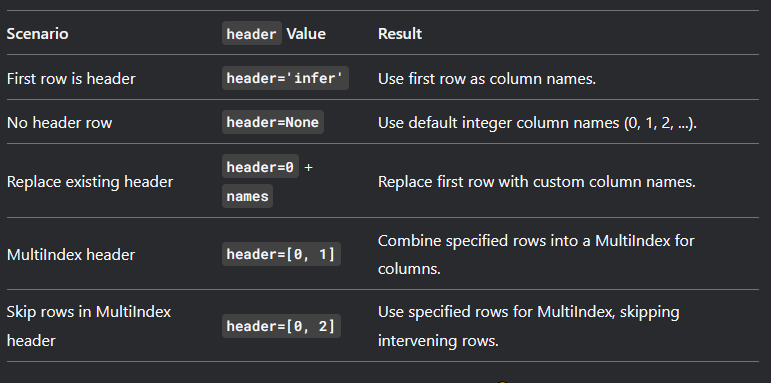

3 read csv

pandas.read_csv is one of the most commonly used functions in Pandas for reading CSV (comma-separated values) files into a DataFrame. It is highly flexible and supports a wide range of parameters to handle various file formats and data cleaning tasks. Below, I'll break down the key parameters and provide examples to help you understand how to use it effectively.

Key Parameters of pandas.read_csv:

- filepath_or_buffer:

    - The path to the file (string, path object, or file-like object).

    - Can also be a URL (e.g., http://, s3://, etc.).

- sep or delimiter:

    - The delimiter used in the file. Default is , (comma).

    - Can be a string (e.g., \t for TSV) or a regex pattern.

- header:

    - Row number(s) to use as column names. Default is 'infer', which uses the first row.

- names:

    - List of column names to use. Overrides the header row if provided.

- index_col:

    - Column(s) to use as the row index. Can be a single column or a list of columns for a MultiIndex.

- usecols:

    - Subset of columns to load. Can be a list of column names or indices, or a callable function.

- dtype:

    - Data types for columns. Can be a single type (e.g., float) or a dictionary mapping columns to types.

- na_values:

    - Additional strings to recognize as NaN/NA.

- parse_dates:

    - Whether to parse dates in specific columns. Can be a boolean, list of columns, or a dictionary.

- compression:

    - Compression type for the file (e.g., 'gzip', 'zip', etc.). Default is 'infer'.

- encoding:

    - Encoding of the file (e.g., 'utf-8').

- on_bad_lines:

    - What to do with malformed lines: 'error', 'warn', 'skip', or a callable function.

In [ ]:
df = pd.read_csv("data.csv")
print(df)

In [ ]:
df = pd.read_csv("data.txt", sep="|")
print(df)

In [ ]:
df = pd.read_csv("data.csv", names=["col1", "col2", "col3"])
print(df)

In [ ]:
# Treat 'N/A' and 'missing' as NaN
df = pd.read_csv("data.csv", na_values=["N/A", "missing"])
print(df)

In [ ]:
# Parse the 'date' column as datetime
df = pd.read_csv("data.csv", parse_dates=["date"])
print(df)

In [ ]:
# Read only 'col1' and 'col3'
df = pd.read_csv("data.csv", usecols=["col1", "col3"])
print(df)

In [ ]:
# Skip bad lines instead of raising an error
df = pd.read_csv("data.csv", on_bad_lines="skip")
print(df)

4 fwf

A FWF (Fixed Width Format) file is a type of text file used for storing data in columns with fixed widths. Unlike CSV or TSV files, which use delimiters (like commas or tabs) to separate values, a fixed-width file relies on the position of the data within each line to determine where one value ends and another begins. Each column in a fixed-width file has a pre-defined width, and spaces are often used to pad shorter values to the designated length.

For example, a line in a fixed-width file might look like this:
- John        Doe         30  M
    - "John" takes up 10 characters
    - "Doe" takes up 10 characters
    - "30" takes up 2 characters
    - "M" takes up 1 character

Parameters:

- filepath_or_buffer: The path to the file or a file-like object (e.g., a URL, or an open file).
- colspecs: Defines the column specifications to read the data. It can be 'infer' (default), which tries to infer the column specifications, or a list of tuples specifying the start and end positions of each column.
- widths: A sequence of widths for the columns. If colspecs is set to 'infer', this parameter is ignored.
- infer_nrows: The number of rows to inspect when inferring column widths. Default is 100.
- dtype_backend: The backend used for data types, which can be numpy or pyarrow.
- iterator: If True, returns a TextFileReader object, allowing you to read the file in chunks.
- chunksize: If specified, the function returns an iterator that reads the file in smaller chunks of the given size.
- **kwds: Additional arguments passed to pandas.read_csv().

In [ ]:
# Read data from a fixed-width formatted file
df = pd.read_fwf('data.txt', colspecs='infer')

5 clipBorad

In programming, a clipboard file typically refers to the data that is temporarily stored in the system's clipboard. The clipboard is a special storage area in an operating system that allows data to be copied from one application and pasted into another. The data on the clipboard can include text, images, files, or any other type of data that can be transferred between programs.

Parameters:

- sep: This specifies the delimiter used to separate values. By default, the separator is set to '\s+', which means one or more whitespace characters. You can change this to any other delimiter (e.g., comma, tab, etc.).

- dtype_backend: This parameter is used to specify the backend  for the data types of the resultant DataFrame. This is still experimental.

- numpy_nullable: Uses NumPy's nullable types (default).
- pyarrow: Uses PyArrow-backed nullable ArrowDtype DataFrame.

- **kwargs: Additional arguments that are passed to the underlying read_csv() function, allowing you to further customize how the clipboard data is parsed (e.g., specifying column names, skipping rows, or handling missing values).

In [ ]:
df = pd.read_clipboard()
print(df)

In [ ]:
df = pd.read_clipboard(sep=',') 

In [ ]:
df = pd.read_clipboard(dtype_backend='pyarrow')

In [ ]:
import pyperclip
html = df.style.to_html()
pyperclip.copy(html)

6 excel

An Excel file is a spreadsheet file created and used by Microsoft Excel or similar spreadsheet applications. It typically has a .xlsx or .xls extension and contains structured data in rows and columns.

- ✅ Sheets (Worksheets) → A file can have multiple sheets (e.g., "Sheet1", "Sheet2").
- ✅ Cells → Smallest unit where data is stored (identified by row & column, e.g., A1).
- ✅ Rows & Columns → Data is arranged in rows (numbers) and columns (letters).
- ✅ Formulas & Functions → Built-in functions like SUM(), AVERAGE(), etc.
- ✅ Charts & Graphs → Visual representation of data.
- ✅ Pivot Tables → Used for data summarization and analysis.

Parameters:
- io: File path, URL, or file-like object.

- sheet_name: Sheet name or index (0 for first sheet, "Sheet1", [0, 1] for multiple).

- header : Row number to use as column names (0 by default, None for no header).

- names : List of custom column names.

- index_col : Column(s) to set as the index (0, "ID", [0, 1]).

- usecols : Select specific columns ("A:D", [0, 2, 4], ["Name", "Age"]).

- dtype : Data type of each column ({"Age": int, "Salary": float}).

- converters : Custom functions for columns ({"Date": pd.to_datetime}).

- skiprows : Number of rows to skip at the top (2).

- skipfooter : Number of rows to skip at the bottom (1).

- parse_dates : Convert column(s) to datetime (["Date"]).

- na_values : Define custom missing values (["N/A"]).

- keep_default_na : Whether to keep default NaN values (True by default).

- na_filter : Disable NaN filtering (False for performance boost).

- verbose : Print additional information (True or False).

- engine : Backend library ("openpyxl", "xlrd", "odf", "pyxlsb").

- storage_options : Options for cloud storage (e.g., S3, Google Cloud).

- mangle_dupe_cols : Rename duplicate columns automatically (True by default).

- thousands : Character used as a thousands separator (",", ".").

- decimal : Character used as a decimal point (".", ",").

- comment : Character marking comment lines ("#").

- nrows : Number of rows to read (10 to read the first 10 rows).

- skip_blank_lines : Ignore empty lines (True by default).

- keep_default_na : Whether to recognize NA, NaN, etc. as missing values.


In [ ]:
# Read an Excel file
df = pd.read_excel("file.xlsx")

In [ ]:
df = pd.read_excel("data.xlsx")  # Local file
df = pd.read_excel("https://example.com/data.xlsx")  # File from URL

In [ ]:
df = pd.read_excel("data.xlsx", sheet_name="SalesData")

In [ ]:
df = pd.read_excel("data.xlsx", names=["A", "B", "C"])

In [ ]:
df = pd.read_excel("data.xlsx", index_col=0)  # First column as index

In [ ]:
df = pd.read_excel("data.xlsx", usecols="A:D")  # Read columns A to D
df = pd.read_excel("data.xlsx", usecols=["Name", "Salary"])

In [ ]:
df = pd.read_excel("data.xlsx", dtype={"Age": int, "Salary": float})

In [ ]:
# Options: 'openpyxl', 'calamine', 'odf', 'pyxlsb', 'xlrd'.
df = pd.read_excel("data.xlsx", engine="openpyxl")

In [ ]:
df = pd.read_excel("data.xlsx", converters={"Date": pd.to_datetime})

In [ ]:
df = pd.read_excel("data.xlsx", skiprows=2, skipfooter=1)

In [ ]:
df = pd.read_excel("data.xlsx", parse_dates=["Date"])

In [ ]:
df = pd.read_excel("data.xlsx", na_values=["N/A", "Not Available"])

In [ ]:
df = pd.read_excel("s3://bucket-name/file.xlsx", storage_options={"key": "secret"})

In [ ]:
df = pd.read_excel(
    "data.xlsx",
    sheet_name="Sales",   # Read the "Sales" sheet
    header=1,             # Use the second row as column names
    usecols="A:D",        # Read columns A to D
    index_col=0,          # First column as index
    parse_dates=["Date"], # Convert "Date" column to datetime
    na_values=["N/A"],    # Treat "N/A" as missing value
)


In [ ]:
data = {"Name": ["Alice", "Bob"], "Age": [25, 30], "Salary": [50000, 60000]}
df = pd.DataFrame(data)

In [ ]:
# Save to Excel
df.to_excel("output.xlsx", sheet_name="Employees", index=False)

In [ ]:
with pd.ExcelFile('data/excel-comp-data.xlsx') as reader:
     df1 = pd.read_excel(reader, 'Sheet1')
     df2 = pd.read_excel(reader, 'Sheet2')

In [ ]:
with pd.ExcelWriter("multi_sheet.xlsx") as writer:
    df.to_excel(writer, sheet_name="Sheet1")
    df.to_excel(writer, sheet_name="Sheet2", index=False)

If io is not a buffer or path, this must be set to identify io. Supported engines: xlrd, openpyxl, odf, pyxlsb, calamine Engine compatibility :

    xlrd supports old-style Excel files (.xls).

    openpyxl supports newer Excel file formats.

    odf supports OpenDocument file formats (.odf, .ods, .odt).

    pyxlsb supports Binary Excel files.

    calamine supports Excel (.xls, .xlsx, .xlsm, .xlsb) and OpenDocument (.ods) file formats.


In [ ]:
xls = pd.ExcelFile("data.xlsx")

# Read first sheet with specific options
df = xls.parse(sheet_name="Sheet1", usecols="A:C", index_col=0, parse_dates=["Date"])

print(df.head())

In [ ]:
sheets = {sheet: xls.parse(sheet) for sheet in xls.sheet_names}

In [ ]:
df = xls.parse(sheet_name=0, parse_dates=["Date"], date_parser=lambda x: pd.to_datetime(x, format="%d/%m/%Y"))

In [ ]:
df = xls.parse(sheet_name=0, skiprows=2, nrows=100, usecols=[0, 2, 4])

7 json

A JSON (JavaScript Object Notation) file is a lightweight, text-based data format used to store and exchange data between systems. It is easy to read and write for both humans and machines.

- ✅ Lightweight – Uses minimal formatting.
- ✅ Easy to Read & Write – Human-readable and simple syntax.
- ✅ Widely Used – Supported in Python, JavaScript, and many other languages.
- ✅ Interchangeable – Works well for data exchange between different systems.

Parmetre :

- path_or_buf : Path to JSON file, JSON string, or buffer (URL, etc.). 

- orient :	Format of JSON ('records', 'split', 'table', etc.).

- typ	:'frame' (default, returns DataFrame) or 'series'.

- dtype:	Dictionary to specify data types for columns.

- convert_axes:	Convert axis labels to a specific type (deprecated).

- convert_dates:	Convert date strings to datetime (True by default).

- keep_default_dates:	Keep default date parsers (True by default).

- precise_float:	Use high precision for float values (False by default).

- date_unit:	Specify unit for date conversion ('ms', 's', etc.).

- encoding:	Character encoding (e.g., 'utf-8').

- encoding_errors: How to handle encoding errors ('strict', 'ignore', etc.).

- lines:	Read JSON line by line (False by default).

- chunksize:	Read JSON in chunks (e.g., 1000 rows at a time).

- compression:	Handle compressed JSON ('gzip', 'zip', 'bz2', etc.).

- nrows:	Number of rows to read.

- storage_options:	Extra storage options (e.g., for cloud storage).

- dtype_backend:	Backend for data types (numpy or pyarrow).

- engine:	JSON parsing engine ('ujson', 'json', etc.).

In [ ]:
df = pd.read_json("data.json")

In [ ]:
json_str = '{"name": ["Alice", "Bob"], "age": [25, 30]}'
df = pd.read_json(json_str)

In [ ]:
url = "https://api.example.com/data.json"
df = pd.read_json(url)

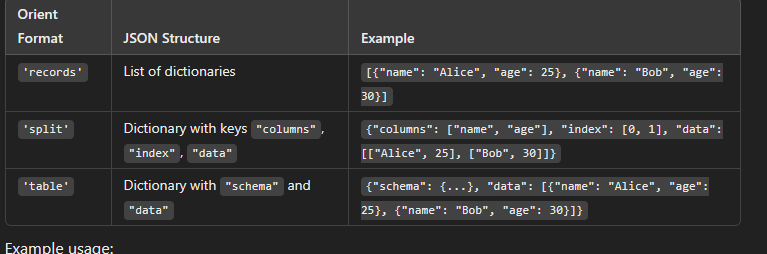

In [ ]:
df = pd.read_json("data.json", orient="records")

In [ ]:
# Read JSON Line by Line (lines=True)
df = pd.read_json("large_data.json", lines=True)

In [ ]:
chunks = pd.read_json("large_data.json", chunksize=1000)

for chunk in chunks:
    print(chunk.shape)  # Process each chunk separately

In [ ]:
df = pd.read_json("data.json.gz", compression="gzip")

Parameters:
1. data (Required)

    The JSON object to normalize.
    Can be a dictionary or a list of dictionaries.

2. record_path (Optional)

    Specifies the nested list in the JSON structure that should be treated as the main data records.
    Can be a string (single-level) or a list of strings (multi-level path).
    If not provided, it assumes data is already a list of records.

3. meta (Optional)

    Specifies which additional fields (outside record_path) should be included as metadata in the output.

4. meta_prefix (Optional)

    A prefix added to metadata fields to avoid column name conflicts.

5. record_prefix (Optional)

    A prefix added to record fields to avoid column name conflicts.

6. errors (Optional, Default = 'raise')

    Determines error handling if metadata fields are missing.
        'raise' → Raises an error.
        'ignore' → Ignores missing fields.

7. sep (Optional, Default = '.')

    Defines the separator for nested column names.
        Example: If sep='_', { "foo": { "bar": 1 } } → Column: foo_bar

8. max_level (Optional)

    Specifies how deep the function should flatten nested structures.
        None → Flattens everything.
        1 → Only flattens the first level.

In [ ]:

data = [
    {"name": "Alice", "info": {"age": 25, "city": "New York"}},
    {"name": "Bob", "info": {"age": 30, "city": "Los Angeles"}}
]

df = pd.json_normalize(data)

In [ ]:
data = {
    "company": "Tech Corp",
    "employees": [
        {"name": "Alice", "age": 25},
        {"name": "Bob", "age": 30}
    ]
}

df = pd.json_normalize(data, record_path=["employees"], meta=["company"])

In [ ]:
df = pd.json_normalize(data,
                    record_path=["employees"], meta=["company"],
                         meta_prefix="meta_",
                            record_prefix="emp_")

Parameters:
1. path_or_buf (Optional)

    str, path-like, or file-like object.
    If specified, the DataFrame will be written to this file. If None, the function returns the JSON as a string.

2. orient (Optional)

    Defines the format of the JSON.
    Available options:
        'split': Dictionary with keys 'index', 'columns', and 'data'.
        'records': List of dictionaries, each representing a row.
        'index': Dictionary where keys are row labels and values are dictionaries of column-value pairs.
        'columns': Dictionary where keys are columns and values are dictionaries of row-value pairs.
        'values': 2D array, just the values (no row or column labels).
        'table': JSON format used for interoperability with Apache Arrow.

3. date_format (Optional)

    Defines the format for dates.
    Can be 'epoch' (timestamp in milliseconds) or 'iso' (ISO 8601 format).

4. double_precision (Optional, Default = 10)

    The number of decimal places to preserve for floating point numbers.

5. force_ascii (Optional, Default = True)

    Whether to escape non-ASCII characters.
        True: Non-ASCII characters are escaped (e.g., "\u1234").
        False: Non-ASCII characters are preserved.

6. date_unit (Optional, Default = 'ms')

    The unit of time for date values (if date_format is 'epoch').
        Options: 's' (seconds), 'ms' (milliseconds), 'us' (microseconds), 'ns' (nanoseconds).

7. default_handler (Optional)

    Function to handle non-serializable objects.
    If not specified, any objects that cannot be serialized to JSON will raise an error.

8. lines (Optional, Default = False)

    Whether to output the JSON in JSON Lines format.
        True: Each row is written as a separate JSON object.
        False: The entire DataFrame is written as one JSON object.

9. compression (Optional, Default = 'infer')

    The compression format for saving the JSON file.
        Options: 'gzip', 'bz2', 'zip', 'xz', or 'infer' (automatically detects based on file extension).

10. index (Optional, Default = None)

    Whether to include index labels in the output JSON.
        True: Include index in the output.
        False: Exclude index from the output.

11. indent (Optional)

    The number of spaces to use for pretty-printing the JSON.
        If None, the JSON is compact (without indentation).
        If an integer, the JSON will be formatted with that many spaces of indentation.

12. storage_options (Optional)

    Extra options for specific storage connections (e.g., if writing to cloud storage like AWS S3).

13. mode (Optional, Default = 'w')

    File mode when opening the file.
        'w': Write (default).
        'a': Append.

In [7]:
df = pd.DataFrame({
    'name': ['Alice', 'Bob'],
    'age': [25, 30]
})

json_string = df.to_json()
print(json_string)

{"name":{"0":"Alice","1":"Bob"},"age":{"0":25,"1":30}}


In [ ]:
json_records = df.to_json(orient='records')
print(json_records)

[{"name":"Alice","age":25},{"name":"Bob","age":30}]


8 Html

pandas.read_html() is a function in Pandas that extracts tables from an HTML page and returns a list of DataFrames. It is useful for web scraping when you need to extract tabular data from websites.

Parameters:

- io (str, path object, or file-like object):
The HTML page source, which can be a URL, a file, or raw HTML content.

- match (str or regex, default='.+'):
A string or regex to match specific tables in the HTML.

- flavor (str or list of str, optional):
The parser to use ("bs4" for BeautifulSoup, "html5lib", or "lxml").

- header (int, list of int, or None, default=None):
Specifies the row(s) to use as column names.

- index_col (int, list of int, or None, default=None):
Columns to use as the index.

- skiprows (int, list of int, or slice, optional):
Rows to skip when reading the table.

- attrs (dict, optional):
Filters tables by attributes (e.g., attrs={"class": "my-table"}).

- parse_dates (bool or list, default=False):
Attempts to parse dates.

- thousands (str, default=','):
Specifies a thousands separator.

- encoding (str, optional):
The encoding of the HTML file (e.g., "utf-8").

- decimal (str, default='.'):
Specifies the decimal separator.

- converters (dict, optional):
Functions to apply to specific columns.

- na_values (scalar, str, list-like, or dict, optional):
Values to consider as NaN.

- keep_default_na (bool, default=True):
Whether to include default NaN values.

- displayed_only (bool, default=True):
Whether to extract only visible tables.

- extract_links ({"full", "name", None}, default=None):
Extracts links inside table cells.

- dtype_backend ({"numpy_nullable", "pyarrow"}, default=None):
Specifies the backend for dtypes.

- storage_options (dict, optional):
Additional options for remote file storage.

In [15]:
url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
tables = pd.read_html(url)

In [11]:
tables = pd.read_html(url, attrs={"class": "wikitable"})
df = tables[0]
df.head()

Country/Territory IMF[1][13]            World Bank[14]             \
  Country/Territory   Forecast       Year       Estimate       Year   
0             World  115494312       2025      105435540       2023   
1     United States   30337162       2025       27360935       2023   
2             China   19534894  [n 1]2025       17794782  [n 3]2023   
3           Germany    4921563       2025        4456081       2023   
4             Japan    4389326       2025        4212945       2023   

  United Nations[15]             
            Estimate       Year  
0          100834796       2022  
1           25744100       2022  
2           17963170  [n 1]2022  
3            4076923       2022  
4            4232173       2022

In [13]:
html_data = """
<table>
<tr><th>Country</th><th>GDP</th></tr>
<tr><td>USA</td><td>21.43</td></tr>
<tr><td>China</td><td>14.34</td></tr>
</table>
"""

df = pd.read_html(html_data)[0]
df.head()

C:\Users\Mohamed Yasser\AppData\Local\Temp\ipykernel_12456\3776868452.py:9: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(html_data)[0]


,Country,GDP
0,USA,21.43
1,China,14.34


DataFrame.to_html(
    buf=None, *, columns=None, col_space=None, header=True, index=True,
    na_rep='NaN', formatters=None, float_format=None, sparsify=None,
    index_names=True, justify=None, max_rows=None, max_cols=None,
    show_dimensions=False, decimal='.', bold_rows=True, classes=None,
    escape=True, notebook=False, border=None, table_id=None,
    render_links=False, encoding=None
)


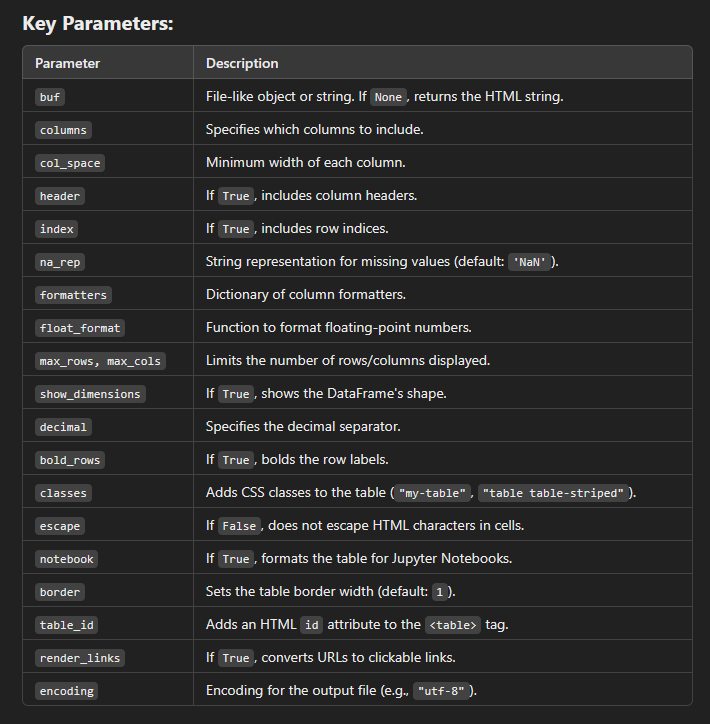

In [ ]:
df = pd.DataFrame({
    "Name": ["Alice", "Bob", "Charlie"],
    "Age": [25, 30, 35],
    "City": ["New York", "Los Angeles", "Chicago"]
})



df.to_html("table.html", border=2, classes="table table-striped")

In [ ]:
html_table = df.to_html(classes="my-table", na_rep="Missing")

In [16]:
df = pd.DataFrame({
    "Website": ["https://google.com", "https://github.com"]
})

html_table = df.to_html(render_links=True)
print(html_table)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Website</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td><a href="https://google.com" target="_blank">https://google.com</a></td>
    </tr>
    <tr>
      <th>1</th>
      <td><a href="https://github.com" target="_blank">https://github.com</a></td>
    </tr>
  </tbody>
</table>


9 Xml

An XML file (Extensible Markup Language) is a structured file format used to store and transport data in a hierarchical manner. It uses tags to define elements and their relationships.

Parmaters:
- path_or_buffer:	Path to an XML file or an XML string.

- xpath:	XPath expression to select XML elements ('./*' selects all child elements).

- namespaces:	Dictionary of namespace prefixes for XML parsing.

- elems_only:	If True, only extracts elements (no attributes).

- attrs_only:	If True, extracts only attributes (no elements).

- names:	Custom column names for the DataFrame.

- dtype:	Data types for columns.

- converters:	Dictionary to apply functions for column conversion.

- parse_dates:	List of columns to parse as dates.

- encoding:	Character encoding (default: 'utf-8').

- parser:	XML parser ('lxml', 'etree', or 'bs4').

- stylesheet:	Apply an XSLT stylesheet for transformation.

- iterparse:	Lazily parse XML for large files.

- compression: Supports 'zip', 'gzip', 'bz2', 'xz', etc.

In [18]:
from io import StringIO

xml_data = """<?xml version='1.0'?>
<data>
    <record>
        <name>Alice</name>
        <age>25</age>
        <city>New York</city>
    </record>
    <record>
        <name>Bob</name>
        <age>30</age>
        <city>Los Angeles</city>
    </record>
</data>
"""

df = pd.read_xml(StringIO(xml_data))

In [ ]:
df = pd.read_xml("data.xml")

In [ ]:
# If the XML structure is deeply nested, use XPath to extract specific elements.
df = pd.read_xml("library.xml", xpath=".//book")

In [ ]:
# Extract Only Attributes (attrs_only=True)
df = pd.read_xml("users.xml", xpath=".//user", attrs_only=True)

In [ ]:
df = pd.read_xml("data.xml.gz", compression="gzip")